In [1]:
import torch.random

from kan import *
from sklearn.metrics import r2_score, mean_squared_error

mse = lambda x, y: torch.mean((x - y) ** 2)

np.random.seed(0)

def get_r2(y, logits):
    logits = logits.squeeze().detach().numpy()
    y = y.squeeze().detach().numpy()
    return r2_score(y, logits)

f1 = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
f2 = lambda x: x[:, [0]] * x[:, [1]]
f3 = lambda x: torch.sin(4*torch.pi*x[:, [0]]) + torch.cos(4*torch.pi*x[:, [1]])
f4 = lambda x: 2 * x[:, [0]] - 3 * x[:, [1]]
f5 = lambda x: x[:, [0]]
dataset1 = create_dataset(f1, n_var=2, train_num=200, test_num=50)
dataset2 = create_dataset(f2, n_var=2, train_num=200, test_num=50)
dataset3 = create_dataset(f3, n_var=2, train_num=200, test_num=50)
dataset4 = create_dataset(f4, n_var=2, train_num=200, test_num=50)
dataset5 = create_dataset(f5, n_var=2, train_num=200, test_num=50)

def get_pandas(dataset, c, d):
    X_train = pd.DataFrame(dataset["train_input"].detach().numpy(), columns=["x", "y"]) + np.random.normal(0, 0.1, (200, 2))
    y_train = pd.DataFrame(dataset["train_label"].detach().numpy())
    X_test = pd.DataFrame(dataset["test_input"].detach().numpy(), columns=["x", "y"]) + np.random.normal(0, 0.1, (50, 2))
    y_test = pd.DataFrame(dataset["test_label"].detach().numpy())
    def get_cat(X):
        X["num_A"] = X["x"] + X["y"]
        X["num_B"] = X["x"] - X["y"]
        X["cat_A"] = c
        X["cat_B"] = d
        X.drop(["x", "y"], axis=1, inplace=True)
    get_cat(X_train)
    get_cat(X_test)
    return X_train, y_train, X_test, y_test

X1_train, y1_train, X1_test, y1_test = get_pandas(dataset1, "a", "e")
X2_train, y2_train, X2_test, y2_test = get_pandas(dataset2, "b", "f")
X3_train, y3_train, X3_test, y3_test = get_pandas(dataset3, "a", "g")
X4_train, y4_train, X4_test, y4_test = get_pandas(dataset4, "c", "f")
X5_train, y5_train, X5_test, y5_test = get_pandas(dataset5, "d", "g")
X_train = pd.concat([X1_train, X2_train, X3_train, X4_train, X5_train])
y_train = pd.concat([y1_train, y2_train, y3_train, y4_train, y5_train])
X_test = pd.concat([X1_test, X2_test, X3_test, X4_test, X5_test])
y_test = pd.concat([y1_test, y2_test, y3_test, y4_test, y5_test])
X_test["cat_A"].iloc[:10] = np.nan
X_test[["cat_A", "cat_B"]].iloc[10:20] = np.nan
X_test["cat_B"].iloc[20:30] = np.nan
X_test.sample(10, random_state=2)

/tmp/ipykernel_9850/3829273700.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test["cat_A"].iloc[:10] = np.nan
/tmp/ipykernel_9850/3829273700.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,num_A,num_B,cat_A,cat_B
39,-0.543343,1.451986,b,f
41,1.256580,-0.507922,b,f
43,0.962589,-1.141822,b,f
24,-0.402510,-0.807111,d,g
26,1.510418,0.461158,a,g
41,1.114421,-0.265630,d,g
31,0.924454,0.606905,d,g
30,-1.722037,-0.091507,a,e
35,-0.277389,0.897440,a,e
39,-0.419498,1.470166,a,g


train loss: 7.42e-01 | test loss: 7.49e-01 | reg: 1.77e+01 : 100%|████| 1/1 [00:04<00:00,  5.00s/it]


New best score: 0.6435705961982308 (iter 0)


train loss: 3.26e-01 | test loss: 4.24e-01 | reg: 1.90e+01 : 100%|████| 1/1 [00:02<00:00,  2.13s/it]


New best score: 0.7983453355115817 (iter 1)


train loss: 2.81e-01 | test loss: 3.68e-01 | reg: 1.94e+01 : 100%|████| 1/1 [00:02<00:00,  2.21s/it]


New best score: 0.824666606732444 (iter 2)


train loss: 2.59e-01 | test loss: 3.57e-01 | reg: 1.98e+01 : 100%|████| 1/1 [00:02<00:00,  2.15s/it]


New best score: 0.8300620823008156 (iter 3)


train loss: 2.40e-01 | test loss: 3.53e-01 | reg: 2.02e+01 : 100%|████| 1/1 [00:02<00:00,  2.01s/it]


New best score: 0.8321873271122964 (iter 4)


train loss: 2.52e-01 | test loss: 3.52e-01 | reg: 2.12e+01 : 100%|████| 1/1 [00:02<00:00,  2.10s/it]


New best score: 0.8326073912773516 (iter 5)


train loss: 2.43e-01 | test loss: 3.48e-01 | reg: 2.14e+01 : 100%|████| 1/1 [00:02<00:00,  2.27s/it]


New best score: 0.8344903063323547 (iter 6)


train loss: 2.33e-01 | test loss: 3.54e-01 | reg: 2.17e+01 : 100%|████| 1/1 [00:02<00:00,  2.16s/it]
train loss: 2.22e-01 | test loss: 3.61e-01 | reg: 2.20e+01 : 100%|████| 1/1 [00:02<00:00,  2.12s/it]
train loss: 2.11e-01 | test loss: 3.89e-01 | reg: 2.24e+01 : 100%|████| 1/1 [00:02<00:00,  2.00s/it]
train loss: 2.34e-01 | test loss: 3.63e-01 | reg: 2.16e+01 : 100%|████| 1/1 [00:02<00:00,  2.25s/it]
train loss: 2.26e-01 | test loss: 3.54e-01 | reg: 2.16e+01 : 100%|████| 1/1 [00:01<00:00,  1.99s/it]
train loss: 2.22e-01 | test loss: 3.62e-01 | reg: 2.17e+01 : 100%|████| 1/1 [00:02<00:00,  2.10s/it]
train loss: 2.16e-01 | test loss: 3.73e-01 | reg: 2.18e+01 : 100%|████| 1/1 [00:02<00:00,  2.01s/it]
train loss: 2.10e-01 | test loss: 3.76e-01 | reg: 2.19e+01 : 100%|████| 1/1 [00:01<00:00,  1.99s/it]
train loss: 2.10e-01 | test loss: 3.81e-01 | reg: 2.18e+01 : 100%|████| 1/1 [00:02<00:00,  2.09s/it]
train loss: 2.06e-01 | test loss: 3.85e-01 | reg: 2.19e+01 : 100%|████| 1/1 [00:01<00:00,  

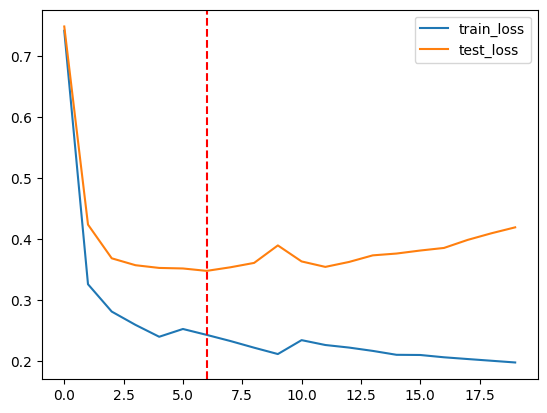

CatLinKAN(
  (biases): ModuleList(
    (0): Linear(in_features=3, out_features=1, bias=False)
    (1): Linear(in_features=1, out_features=1, bias=False)
  )
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): Identity(in_features=1, out_features=1, bias=True)
    )
  )
  (base_fun): Identity(in_features=1, out_features=1, bias=True)
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
  (embeddings): ModuleDict(
    (cat_A): Embedding(5, 2)
    (cat_B): Embedding(4, 2)
  )
  (bn): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden): ParametrizedLinear(
    in_features=6, out_features=20, bias=False
    (parametrizations): ModuleDict(
      (weight): ParametrizationList(
        (0): _WeightNorm()
      )
    )
  )
)

In [2]:
model = CatLinKAN(X_train, include_linear=True, width=[20,3,1], grid=5, k=3, seed=0, base_fun=Identity())
train_input, train_label = model.init_data(X_train, y_train)
test_input, test_label = model.init_data(X_test, y_test)

params = {"dataset": {"train_input": train_input, "train_label": train_label, "test_input": test_input, "test_label": test_label},
          'loss_fn': mse, "steps": 1}

train_model(model, params, get_r2, opt='LBFGS', lr=0.05, plot=True, iters=20, log=1)

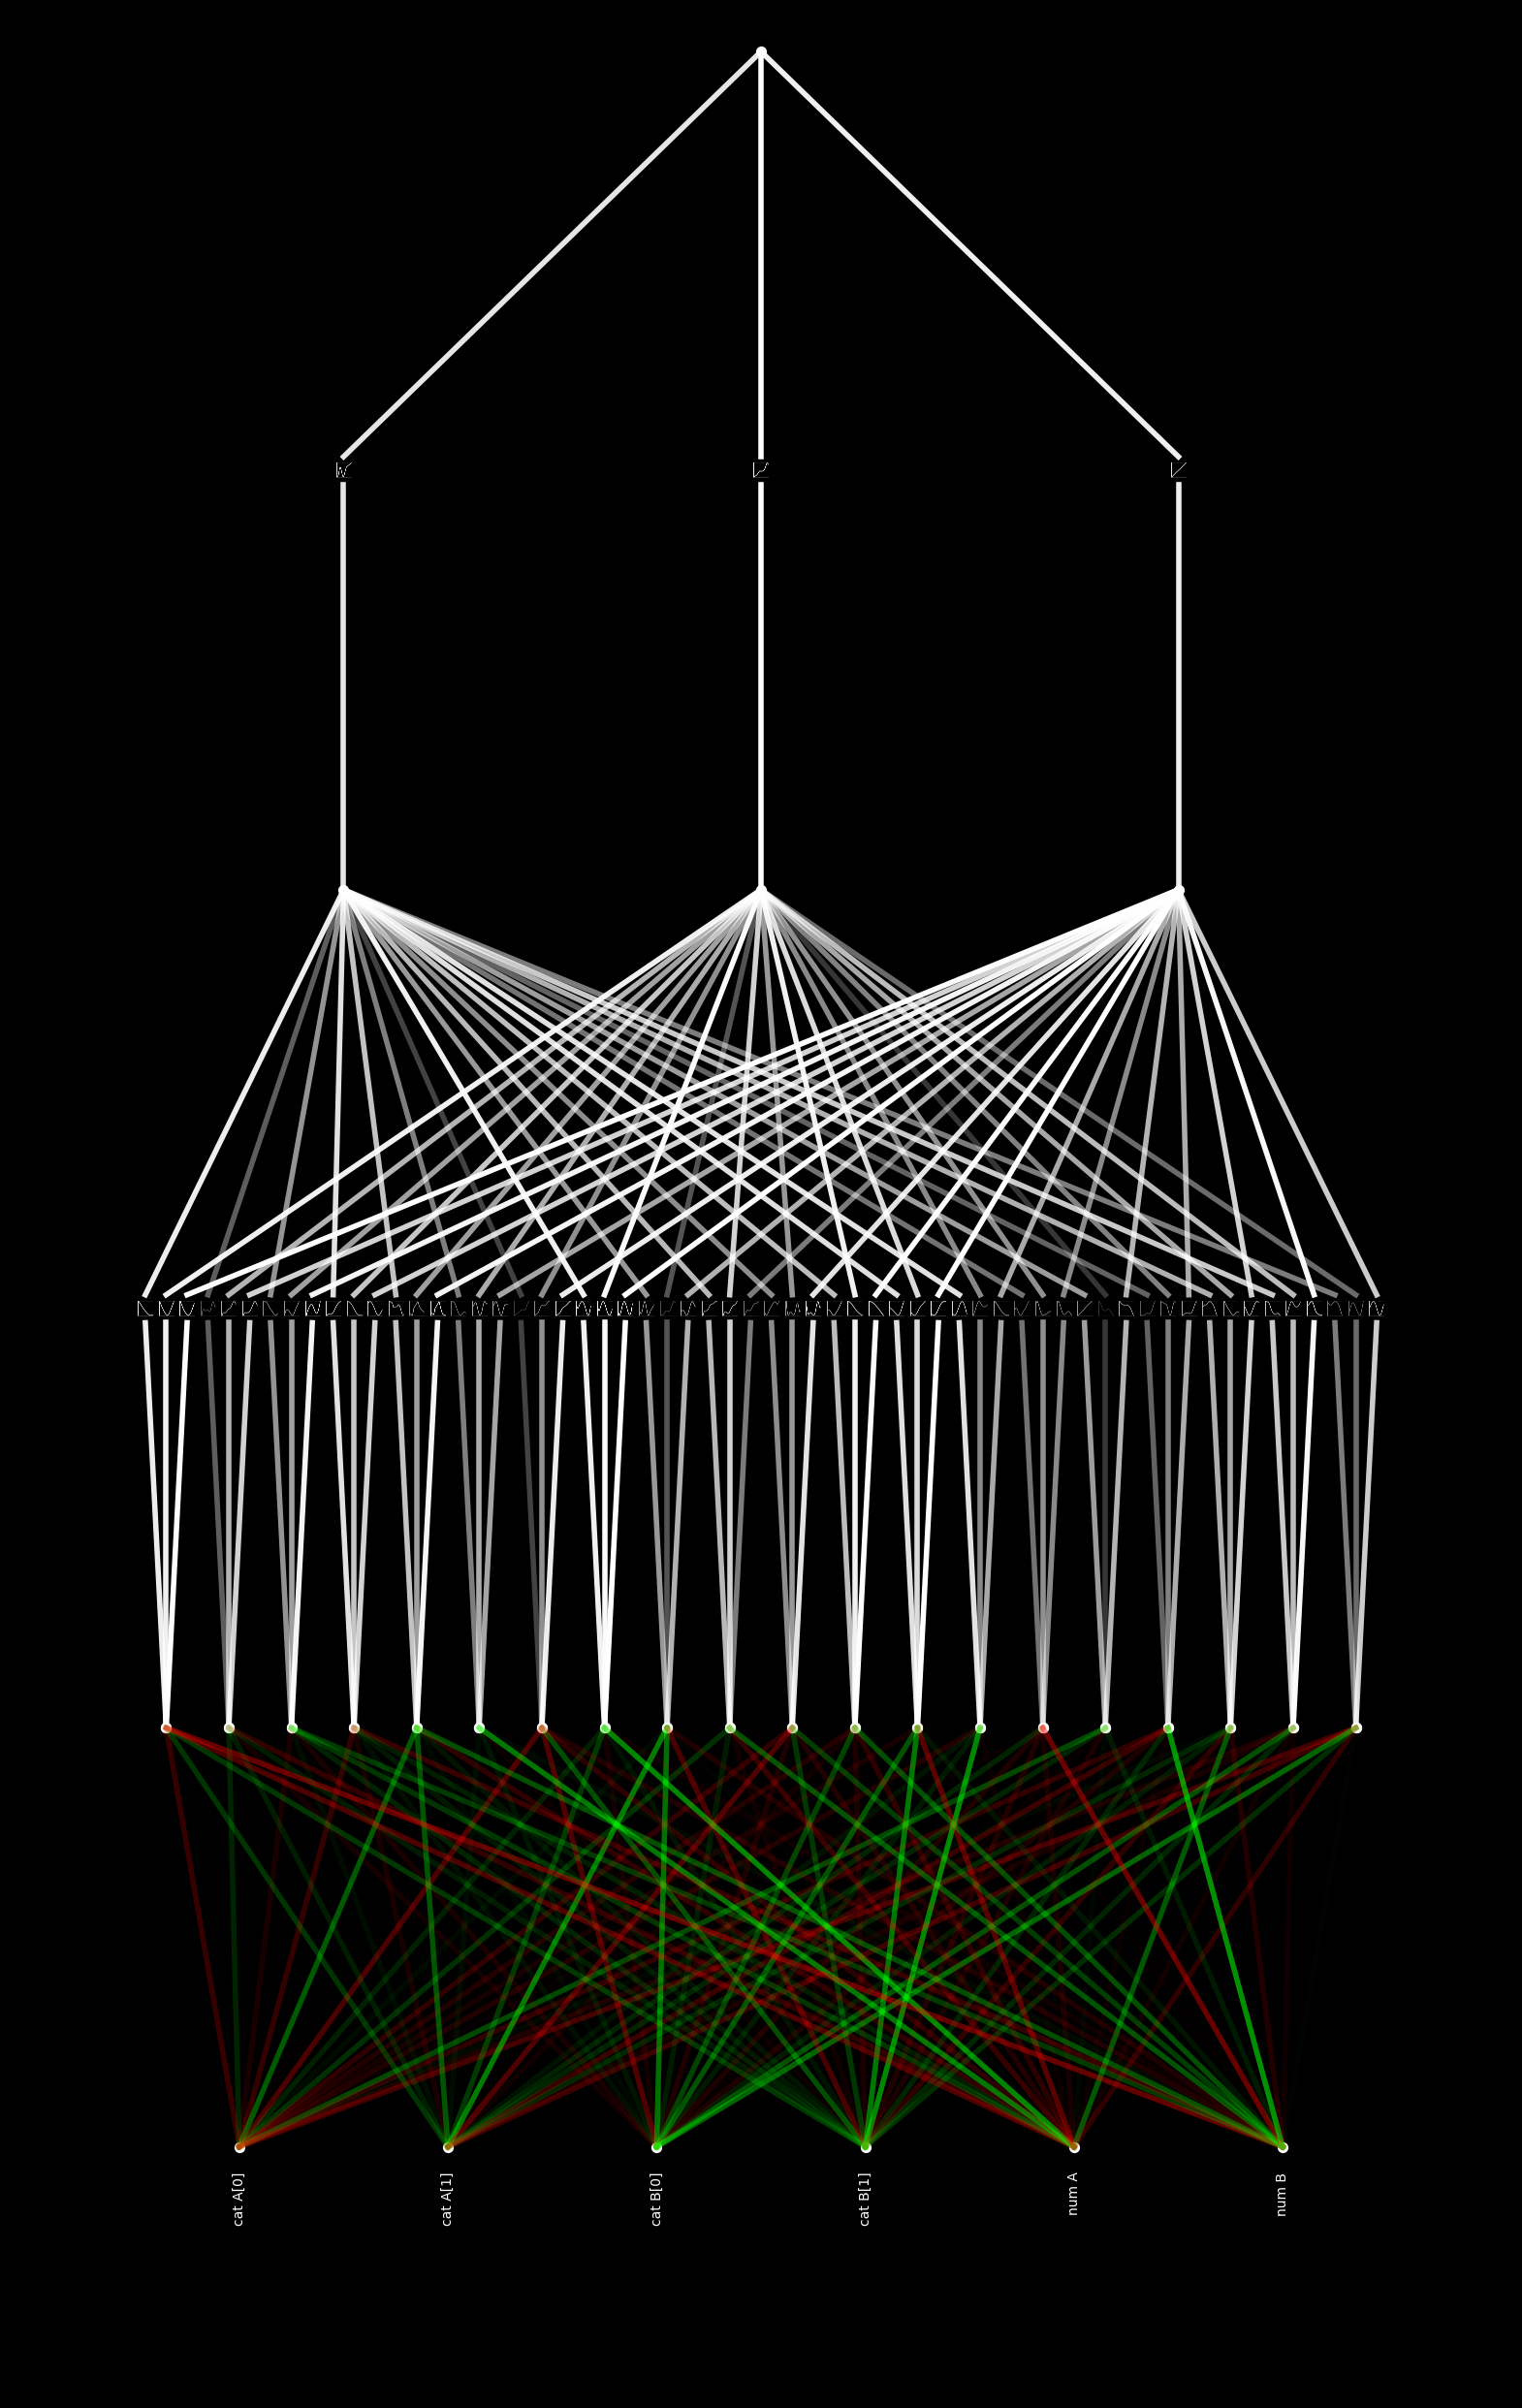

In [3]:
model(train_input)
model.plot(beta=10, scale=2, in_vars=model.get_in_vars())
plt.savefig("catlinkan.png", dpi=300, bbox_inches="tight")
plt.show()

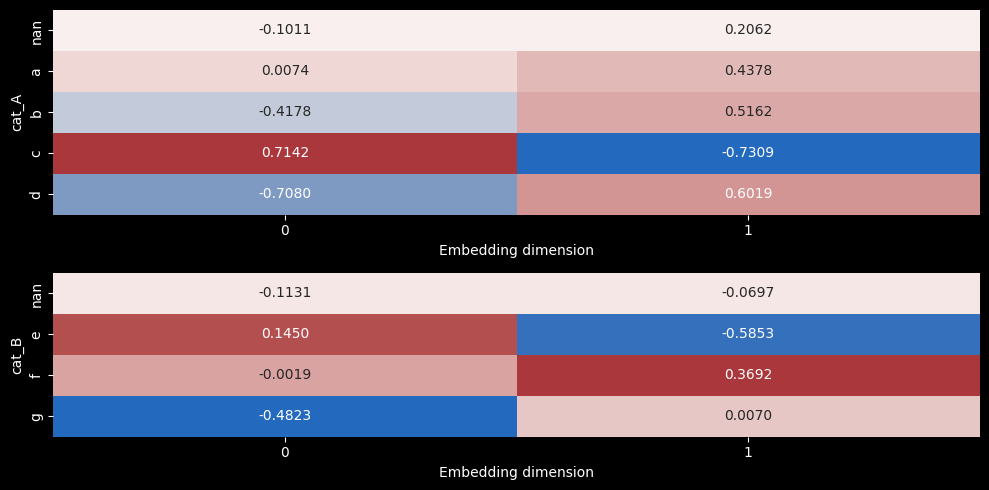

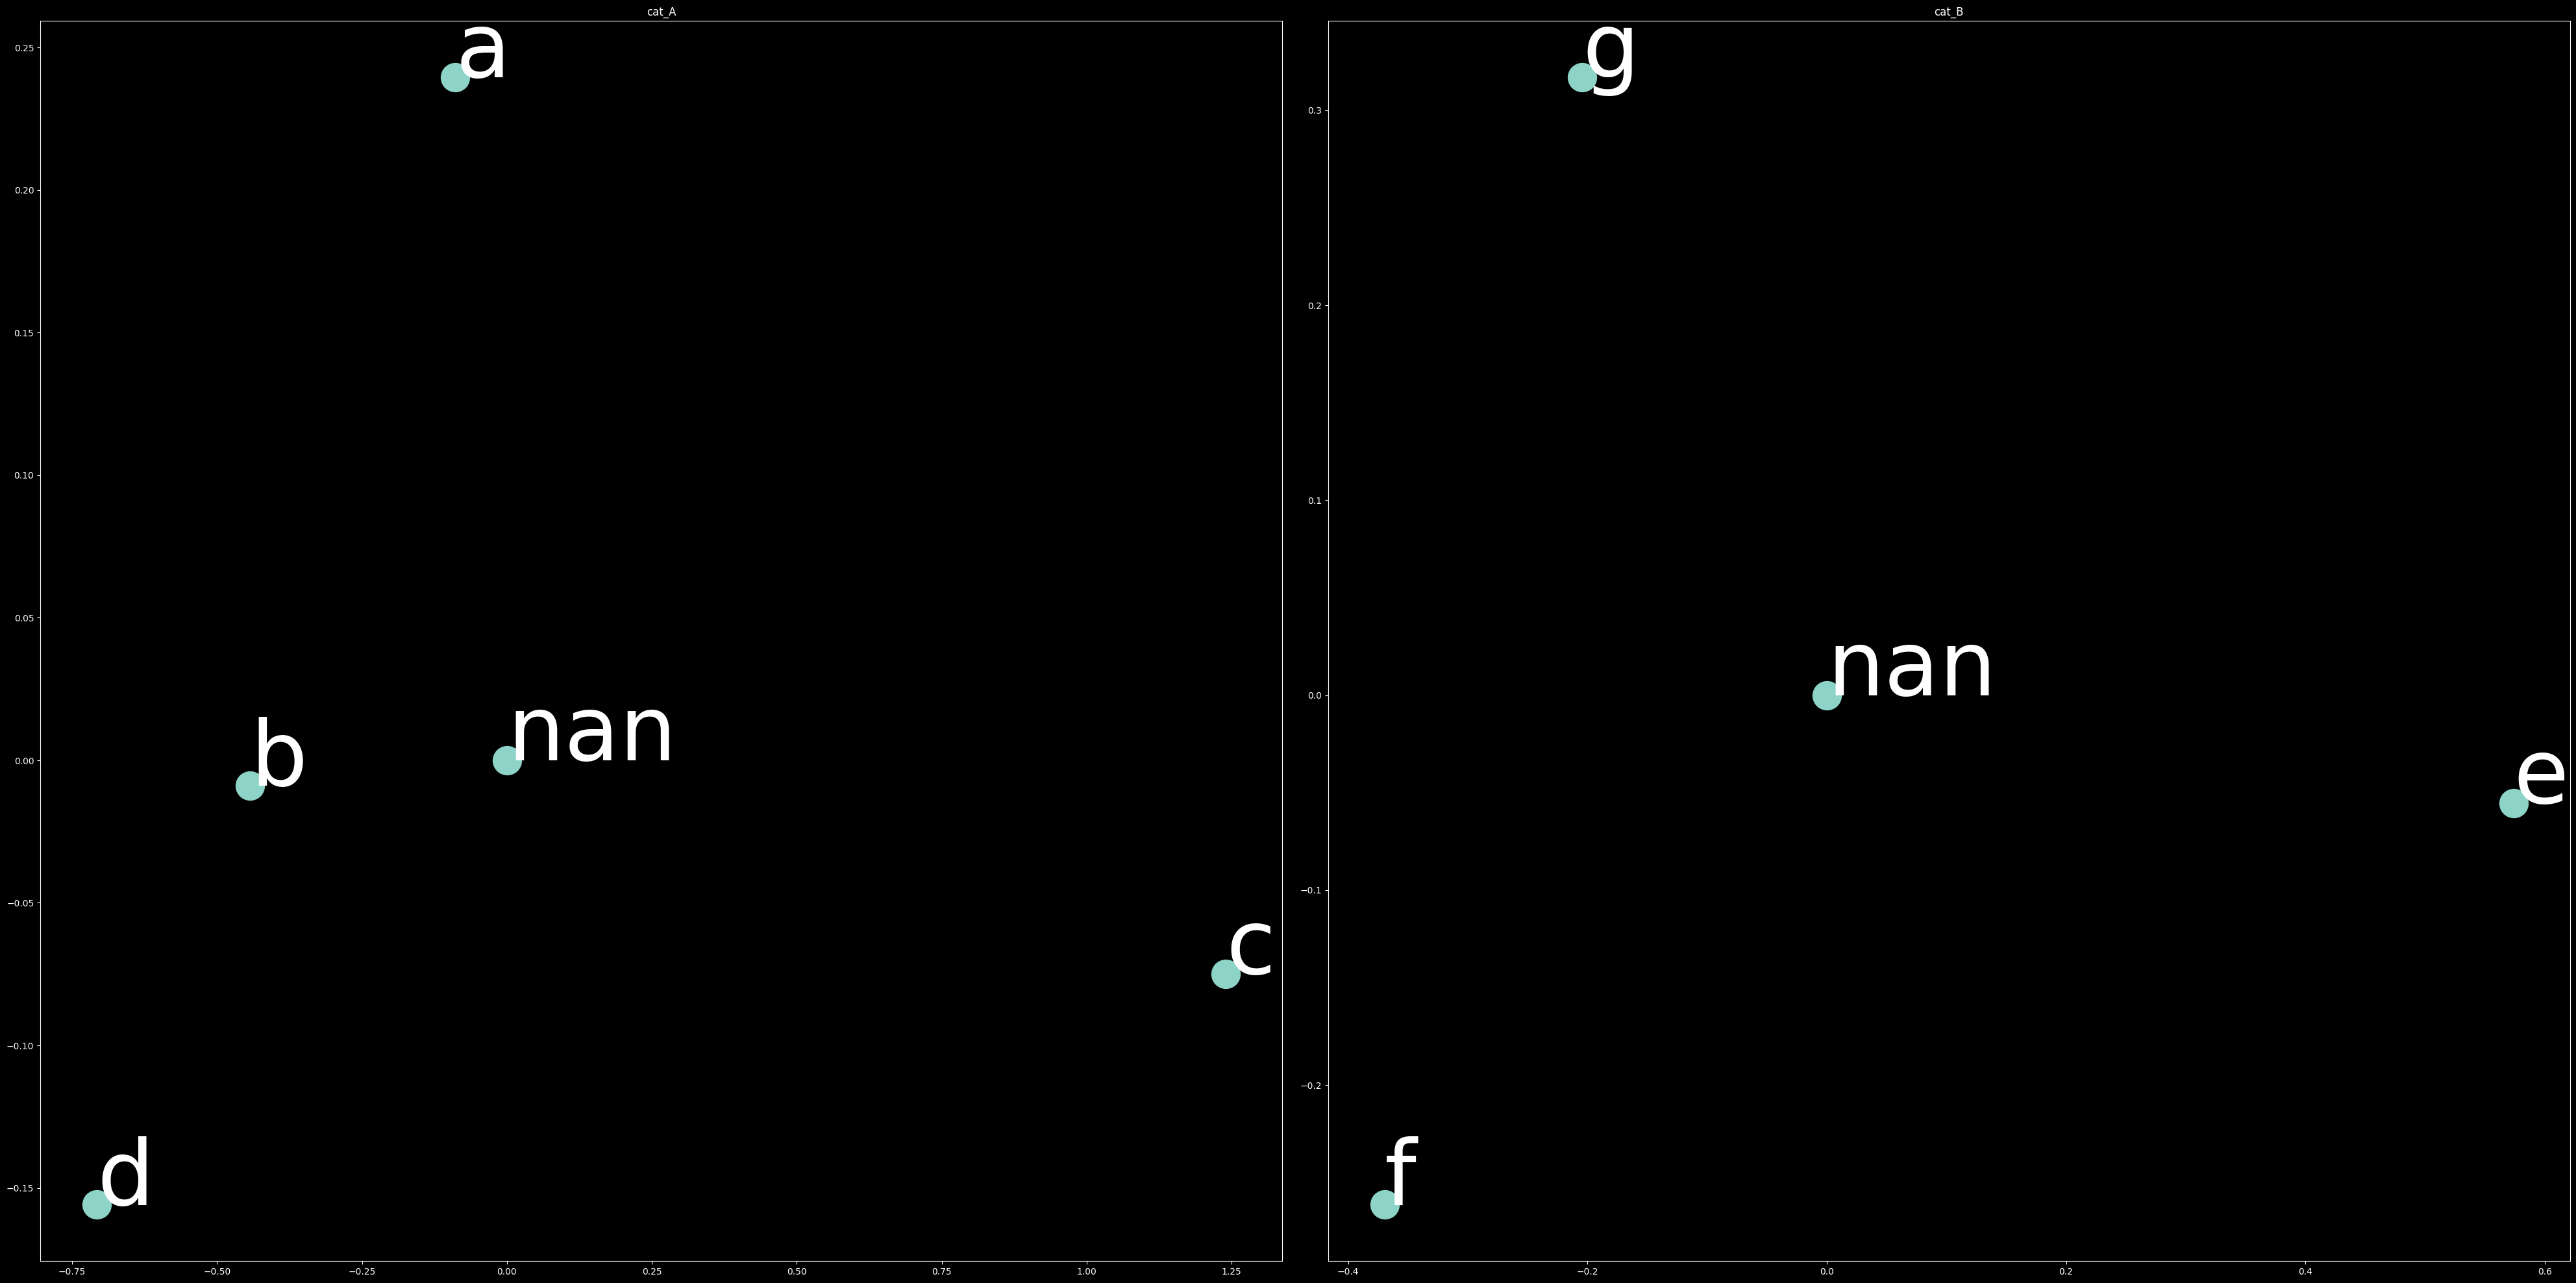

In [4]:
model.plot_embeddings()

In [5]:
# autosym_model(model)